In [1]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
from torchvision import transforms, datasets
import torchvision.transforms.functional as TF
import cv2

import os
from PIL import Image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_paths = '../A3/cat_data/Train/input'
idx = 2
image = Image.open(os.path.join(image_paths, "cat.{}.jpg".replace('{}', str(idx))))

#### Rotation

In [3]:
# random rotate
def rotate90(image):
    angle = 90 * np.random.randint(-1, 2, (1,))
    rotated = TF.rotate(image, angle)
    return rotated

In [5]:
rotated = rotate90(image)
rotated.save('rotated.jpg')

#### Perspective

In [5]:
def perpective(image):
    scale = 0.1
    width, height = image.size
    dh, dw = int(scale*height), int(scale*width)
    corner0 = (np.random.randint(0, dh), np.random.randint(0, dh))
    corner1 = (np.random.randint(width - dw - 1, width - 1), np.random.randint(0, dh))
    corner2 = (np.random.randint(width -dw -1, width - 1), np.random.randint(height-dh-1, height-1))
    corner3 = (np.random.randint(0, dw), np.random.randint(height - dh -1, height-1))
    startpoints = np.array([(0, 0), (width - 1, 0), (width - 1, height - 1), (0, height - 1)], dtype=np.float32)
    endpoints = np.array([corner0, corner1, corner2, corner3], dtype=np.float32)

    perspective = TF.perspective(image, startpoints, endpoints)
    return perspective

/home/ruiqi/anaconda3/lib/python3.7/site-packages/torchvision/transforms/functional.py:440: UserWarning: torch.gels is deprecated in favour of torch.lstsq and will be removed in the next release. Please use torch.lstsq instead.
  res = torch.gels(B, A)[0]


In [ ]:
perspective.save('perspective.jpg')

#### Crop and Zoom

In [26]:
affine = transforms.RandomAffine(0, translate=(0.3, 0.3), scale=(0.8, 1.5))

In [27]:
temp = affine(image)

#### Color

In [20]:
brightness = np.random.uniform(0.5, 1.5)
jitter = brightness * np.array(image).astype(np.float32)
jitter = np.clip(jitter, 0, 255).astype(np.uint8)
jittered = Image.fromarray(jitter)
jittered.save('jitter.jpg')

#### Noise

In [34]:
def block(image, scale, p):

    width, height=image.size
    w, h = int(scale*width), int(scale*height)
    mask = np.random.rand(w, h)
    mask = mask > p
    mask = cv2.resize(mask.astype(np.uint8), (width, height), interpolation=0)

    blocked = np.stack([mask, mask, mask], axis=2) * image

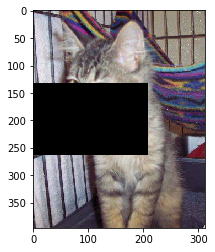

In [35]:
scale=0.01
p=0.3
blocked = block(image, scale, p)
plt.imshow(blocked)